In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')

In [3]:
X_train.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,0.428253,0.12500,0.424242,0.000000,0.0,0.644,0.998,0.952,0.998,0.028125,...,0.4,0.6,0.0,0.6,0.2,0.0,0.0,0.2,0.0,0.0
1,0.428310,0.25000,0.121212,0.428571,0.0,0.526,0.720,0.574,0.770,0.068125,...,0.4,0.6,0.0,0.4,0.0,0.0,0.0,0.6,0.0,0.0
2,0.382136,0.31250,0.303030,0.857143,0.0,0.724,0.600,0.756,0.000,0.122500,...,0.4,0.0,0.6,0.0,0.4,0.0,0.0,0.0,0.0,0.0
3,0.313732,0.12500,0.212121,0.714286,0.0,0.988,1.000,0.990,1.000,0.086875,...,0.6,0.4,0.6,0.8,0.4,0.0,0.0,0.4,0.0,0.0
4,0.542545,0.28125,0.303030,0.571429,0.0,1.000,0.824,0.946,0.970,0.155625,...,1.0,0.6,1.0,0.4,0.4,0.0,0.0,0.6,0.0,0.0


In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [5]:
def model_info(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred))
    print('Recall score: ', recall_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred))

In [6]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    print('Train data:\n')
    y_train_pred = model.predict(X_train)
    model_info(y_train, y_train_pred)
    
    print('\n--------------------------------------\n')

    print('Test data:\n')
    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)

    return model

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtc = DecisionTreeClassifier(random_state=55)

In [9]:
dtc = build_model(dtc, X_train, X_test, y_train, y_test)

Train data:

Confusion matrix: 
 [[47918   114]
 [  181 49697]]
Accuracy score:  0.9969870289040956
Precision score:  0.9977113488988376
Recall score:  0.9963711455952524
F1 score:  0.9970407968782915

--------------------------------------

Test data:

Confusion matrix: 
 [[ 9812  2152]
 [ 2118 10396]]
Accuracy score:  0.8255576435983332
Precision score:  0.8284985655084476
Recall score:  0.8307495604922487
F1 score:  0.829622536110446


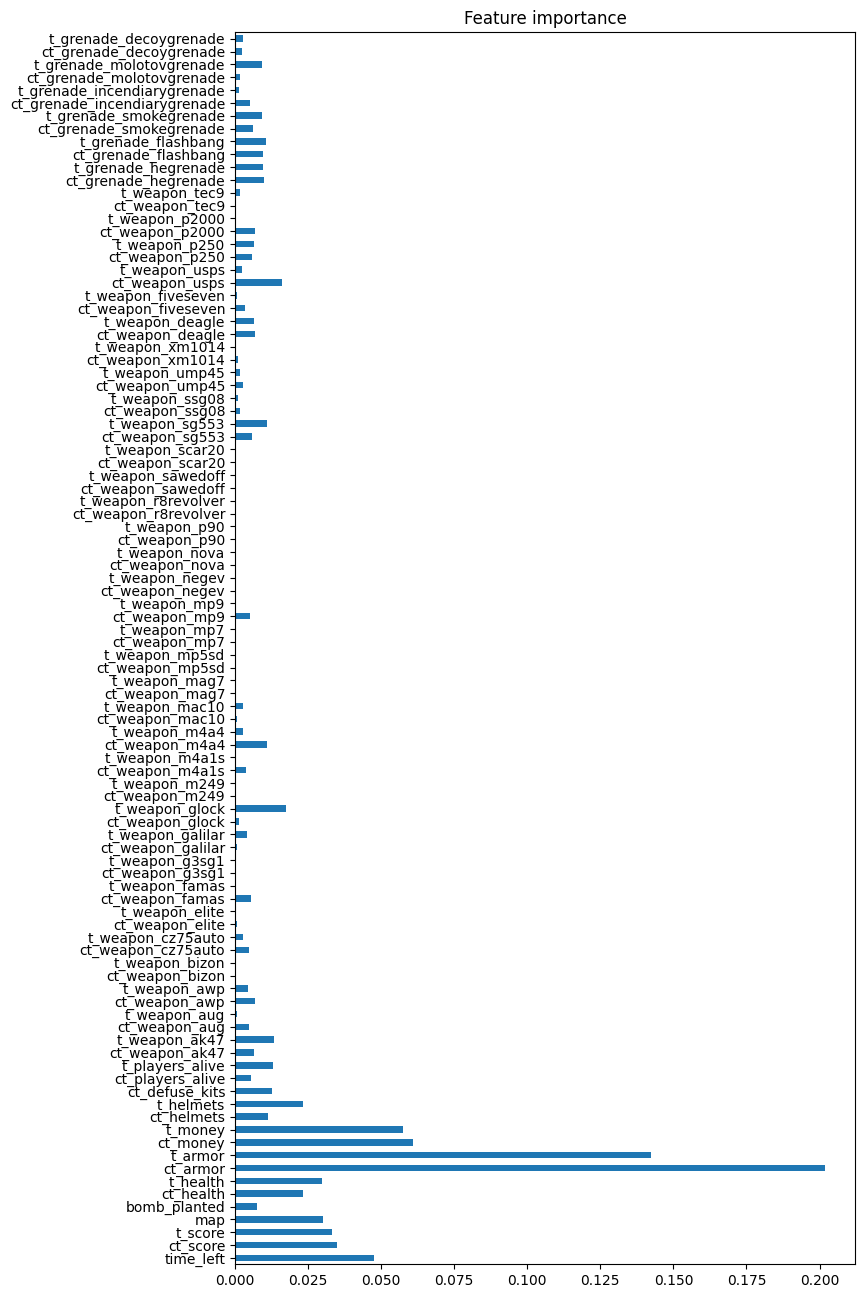

In [10]:
plt.figure(figsize=(8, 16))
pd.Series(dtc.feature_importances_, index=X_train.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, 25, 30, 35, 40, 45]
}

In [12]:
estimator = GridSearchCV(DecisionTreeClassifier(random_state=55), param_grid=params, cv=3)

In [13]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=55),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30, 35, 40, 45]})

In [14]:
estimator.best_params_

{'criterion': 'entropy', 'max_depth': 45}

In [15]:
estimator.best_score_

0.7949749895991561

In [16]:
estimator = build_model(estimator, X_train, X_test, y_train, y_test)

Train data:

Confusion matrix: 
 [[47687   345]
 [  221 49657]]
Accuracy score:  0.9942191808804004
Precision score:  0.9931002759889604
Recall score:  0.9955691888207225
F1 score:  0.9943331998398078

--------------------------------------

Test data:

Confusion matrix: 
 [[ 9776  2188]
 [ 2077 10437]]
Accuracy score:  0.8257619086526677
Precision score:  0.8266930693069307
Recall score:  0.8340258910020777
F1 score:  0.8303432913003699


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
random_forest = RandomForestClassifier(random_state=55)

In [24]:
random_forest = build_model(random_forest, X_train, X_test, y_train, y_test)

Train data:

Confusion matrix: 
 [[47880   152]
 [  143 49735]]
Accuracy score:  0.9969870289040956
Precision score:  0.9969531140377252
Recall score:  0.9971330045310558
F1 score:  0.99704305117025

--------------------------------------

Test data:

Confusion matrix: 
 [[10598  1366]
 [ 1626 10888]]
Accuracy score:  0.8777677914862325
Precision score:  0.8885261955279908
Recall score:  0.8700655266101965
F1 score:  0.8791989664082687


In [32]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 200, 300]
}

estimator_rf = GridSearchCV(RandomForestClassifier(random_state=55), param_grid=params, cv=3)

In [33]:
estimator_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=55),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 200, 300]})

In [34]:
estimator_rf.best_params_

{'criterion': 'gini', 'n_estimators': 300}

In [35]:
estimator_rf.best_score_

0.8558676669963269

In [37]:
estimator_rf = build_model(estimator_rf, X_train, X_test, y_train, y_test)

Train data:

Confusion matrix: 
 [[47877   155]
 [  140 49738]]
Accuracy score:  0.9969870289040956
Precision score:  0.9968933517727938
Recall score:  0.9971931512891455
F1 score:  0.9970432289943971

--------------------------------------

Test data:

Confusion matrix: 
 [[10641  1323]
 [ 1558 10956]]
Accuracy score:  0.8823024756924586
Precision score:  0.8922550696310775
Recall score:  0.8754994406264983
F1 score:  0.8837978461662567


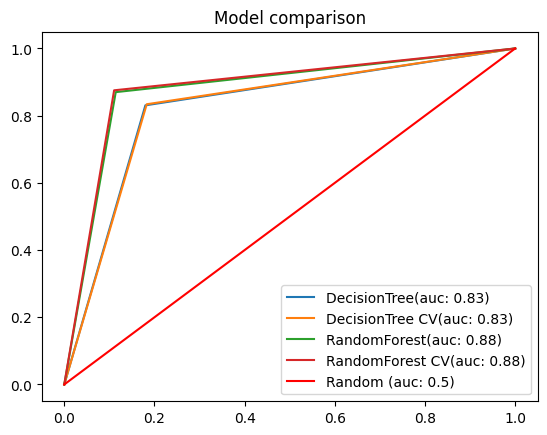

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [dtc, estimator.best_estimator_, random_forest, estimator_rf.best_estimator_]
model_names = ['DecisionTree', 'DecisionTree CV',  'RandomForest', 'RandomForest CV']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()

In [40]:
from joblib import dump

In [41]:
dump(models, 'trees.joblib')

['trees.joblib']